In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import prange


@njit
def generer_tableau(ratio,size):
    nb = int(size*size*ratio)
    a = np.zeros(size*size)
    arr = np.arange(size*size)
    np.random.shuffle(arr)
    a[arr[:nb]]=1
    return a.reshape((size, size))




@njit
def calcul_DE(tableau,x,y,size):

    # condition au bord
    if x==0 or x==size-1 or y==0 or y==size-1:
      extended_tab = np.zeros((size+2,size+2))
      extended_tab[1:size+1,1:size+1] = tableau
      extended_tab[0,1:size+1] = tableau[-1]
      extended_tab[-1,1:size+1] = tableau[0]
      extended_tab[1:size+1,0]= tableau[:,size-1]
      extended_tab[1:size+1,size+1]= tableau[:,0]
      table_locale = extended_tab[x:x+3,y:y+3]
      o = table_locale[1,1]*2-1
      a = table_locale[0,1]*2-1
      b = table_locale[1,0]*2-1
      c = table_locale[1,2]*2-1
      d = table_locale[2,1]*2-1

    #cas générale
    else:
      table_locale = tableau[x-1:x+2,y-1:y+2]
      o = table_locale[1,1]*2-1
      a = table_locale[0,1]*2-1
      b = table_locale[1,0]*2-1
      c = table_locale[1,2]*2-1
      d = table_locale[2,1]*2-1
    return(2*o*(a+b+c+d))


@njit(parallel=True)
def new_point_parallel(tableau, size, T):
    for _ in prange(size*size*1000):
        coordx = np.random.randint(size)
        coordy = np.random.randint(size)
        DE = calcul_DE(tableau, coordx, coordy, size)
        if test(DE, T):
            tableau[coordx, coordy] = not tableau[coordx, coordy]
    return tableau


@njit
def test(DE,T):
    if DE==0 or DE ==-4 or DE==-8:
        return(True)
    if DE==4 or DE==8:
      x = np.random.uniform()
      return(x<np.exp(-DE/T))
    else:
      print("erreur, DE = ",DE)
      return False

@njit
def M(tableau,size):
  totplus = np.sum(tableau)
  return(abs(-1*(size*size - totplus) + totplus)/(size*size))

génération d'un tableau pour une temperature T donnée, la situation à l'aire stable pour size*size*1000 tentative d'ajout de points

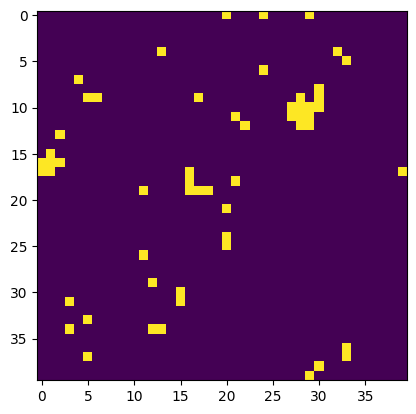

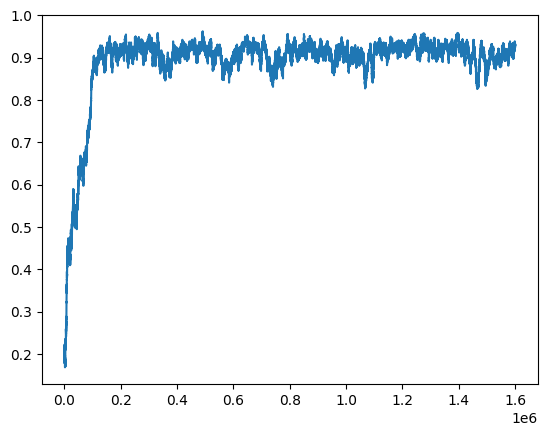

In [22]:
ratio_cases = 0.4
size = 40
nb_pas = 1000
T = 2
Mliste = np.empty(size*size*1000)
Mean = np.empty((20,size*size*1000))
for j in range(1):
  tab = generer_tableau(ratio_cases,size)
  for i in range(size*size*1000):
    tab = new_point(tab,size,T)
    Mliste[i]=2*np.abs((np.sum(tab)-800))/(1600)
  Mean[j]= Mliste
plt.imshow(tab)
plt.show()
plt.plot(Mliste)


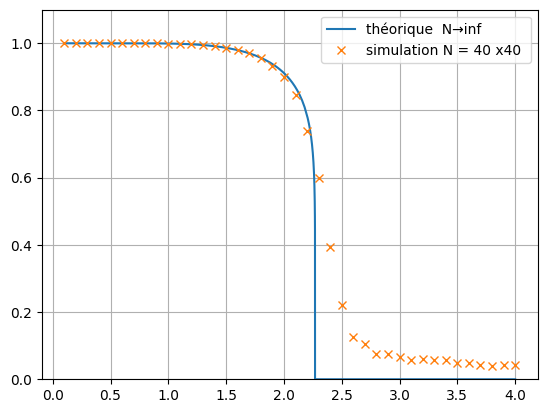

In [ ]:
res= np.array([1.0,1.0,1.0,1.0,1.0,0.999992525,0.999963175,0.9999071875,
               0.9997235625,0.9992421625000002,0.9983736625,0.9972582500000001,
               0.9950057625,0.9917844375000001,0.9861117875000001,0.980713025,
               0.9703213249999999,0.9572347000000002,0.9314611,0.8993159500000002,
               0.8468276125000002,0.7380578749999998,0.597834375,0.39340465,
               0.22180830000000004,0.12486666249999999,0.1043114625,0.075823175,
               0.0747835,0.0661694125,0.056577262499999996,0.06057473749999999,
               0.057226550000000015,0.058199412500000006,0.049275462500000006,
               0.048698675,0.04296277499999999,0.038713437499999996,0.042799500000000004,
               0.04230882500000001])
T = np.concatenate((np.linspace(0.1,2.2,100),np.linspace(2.2,2.26918478,100)))
x = (1-1/(np.sinh(2/T))**4)**(1/8)
plt.plot(list(T)+[2.269,3,3.5,3.7,4],list(x)+[0,0,0,0,0],label ="théorique  N→inf")
plt.plot(np.linspace(0.1,4,40),np.array(res),"x",label = "simulation N = 40 x40 ")
plt.ylim((0,1.1))
plt.grid()
plt.legend()

In [ ]:
np.mean(np.array([[1,2,3],[1,2,3],[1,2,3]]),axis=0)

array([1., 2., 3.])

In [ ]:
0.3*np.exp(-0/110000)+0.05

0.35

https://www.f-legrand.fr/scidoc/docmml/sciphys/physistat/ising2d/ising2d.html
https://femto-physique.fr/simulations/ising2D.php